In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

The Data Visualization on Goodreads dataset was done during Covid-19 Lockdown. We will answer some important questions:
- Authors with the most books.
- Books with highest ratings.
- Books with highest number of reviews.
- Top Publishing house. 

### Reading the dataset

In [8]:
df = pd.read_csv('books.csv',  error_bad_lines = False, index_col = 'bookID')
df.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [27]:
df.shape

(11123, 11)

- There are 11123 rows and 11 columns in the dataset.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
title                 11123 non-null object
authors               11123 non-null object
average_rating        11123 non-null float64
isbn                  11123 non-null object
isbn13                11123 non-null int64
language_code         11123 non-null object
  num_pages           11123 non-null int64
ratings_count         11123 non-null int64
text_reviews_count    11123 non-null int64
publication_date      11123 non-null object
publisher             11123 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


- info() provides information about columns in the dataset like column name, number of values, type of data. 

### Visualizing the Data 

### Which language of the books are in the dataset?

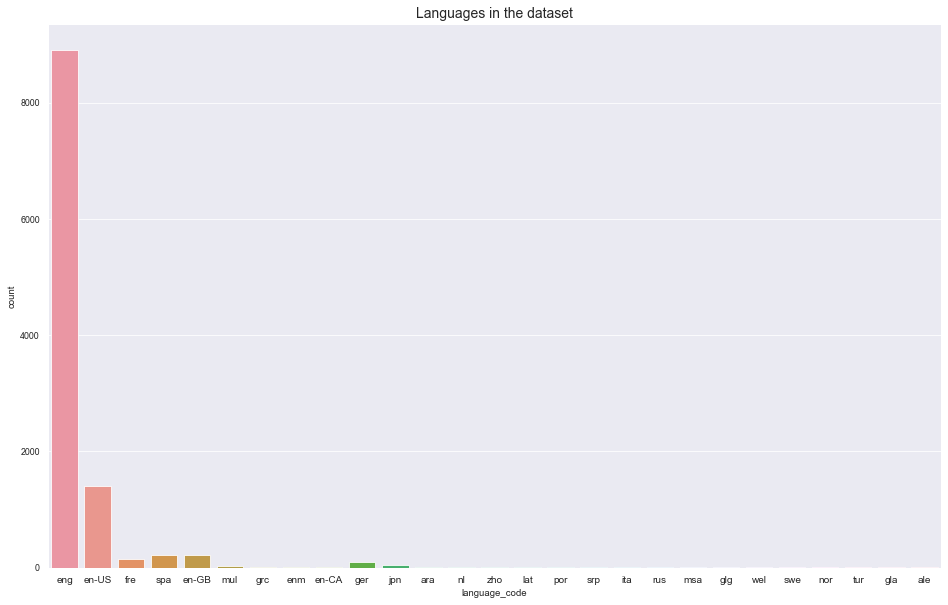

In [375]:
plt.figure(figsize=(16,10))
plt.title('Languages in the dataset', fontsize = 14)
sns.countplot(df['language_code'])
plt.xticks(fontsize = 10)
plt.show()

- We will plot the graph again with the most languages in the dataset.

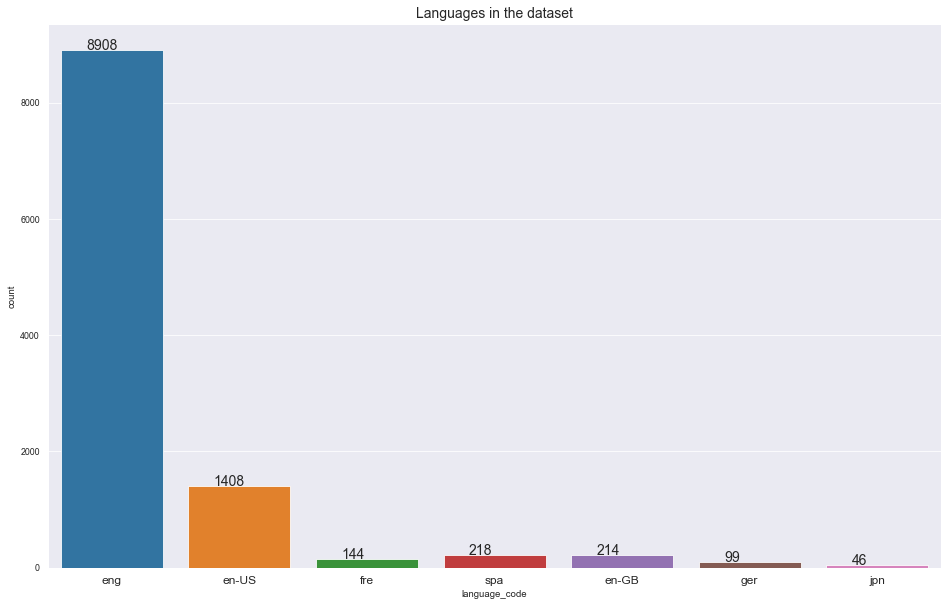

In [433]:
lang = df.loc[df.language_code.isin(['eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', 'jpn'])]

plt.figure(figsize=(16,10))
plt.title('Languages in the dataset', fontsize = 14)
graph = sns.countplot(lang['language_code'])
plt.xticks(fontsize = 12)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/4., height + 0.1, height, fontsize = 14)
plt.show()

- English language books are most in number in the dataset with again subdividing into English-US, English-UK, English-CA.
- Apart from English, the dataset contains French, Spanish, German and Japanese books.
- The remaining languages contains very negligible amount of books in the dataset.

### Which Authors have most number of books?

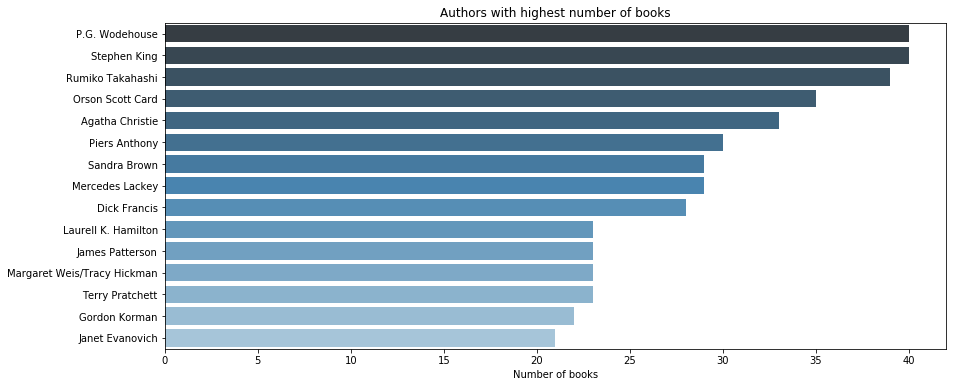

In [56]:
most_books = df['authors'].value_counts()[:15]
plt.figure(figsize = (14,6))
sns.barplot(x = most_books, y = most_books.index, palette = 'Blues_d')
plt.title('Authors with highest number of books')
plt.xlabel('Number of books')
plt.show()

- P.G. Wodehouse and Stephen King have written highest number of books with 40 each.

### Books with highest number of ratings 

In [140]:
most_ratings = df[['ratings_count']].set_index(df['title']).sort_values(by = 'ratings_count', ascending = False)[:15]

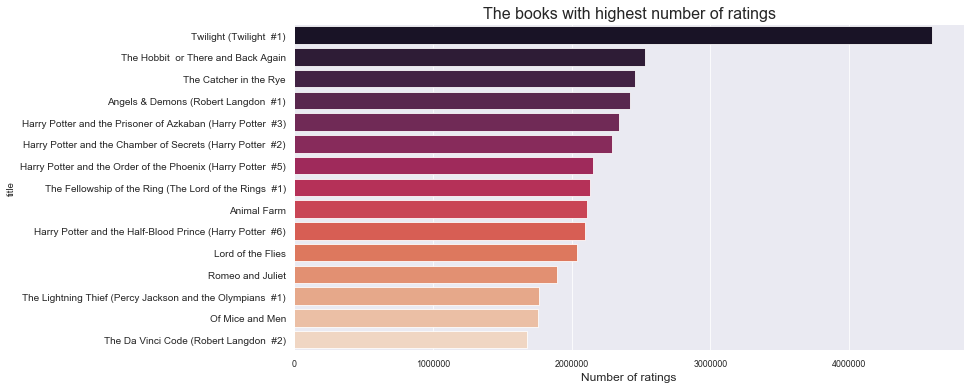

In [242]:
plt.figure(figsize = (12,6))
sns.barplot(x = most_ratings['ratings_count'], y = most_ratings.index, palette = 'rocket')
plt.yticks(fontsize = 10)
plt.xlabel('Number of ratings', fontsize = 12)
plt.title('The books with highest number of ratings', fontsize = 16)
plt.show()

- Twilight has recieved most number of ratings and is almost double than any other book.
- Harry Potter books have recieved most ratings. We can tell that the count of ratings for HP books are same which tells us that almost all readers are giving ratings after completing each HP book.
- Fantasy Fiction genre can be seen more in this graph.

### Books with highest number of reviews

In [153]:
most_reviews = df[['text_reviews_count']].set_index(df['title']).sort_values(by = 'text_reviews_count', ascending = False)[:15]

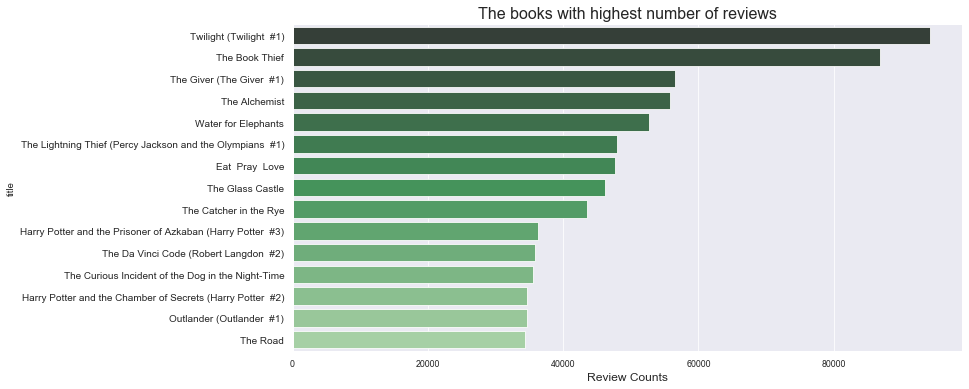

In [306]:
plt.figure(figsize = (12,6))
sns.barplot(x = most_reviews['text_reviews_count'], y = most_reviews.index, palette = 'Greens_d')
plt.yticks(fontsize = 10)
plt.xlabel('Review Counts', fontsize = 12)
plt.title('The books with highest number of reviews', fontsize = 16)
plt.show()

- From the chart we can see that Twilight has recieved the most reviews. And also from the previous chart it was the most rated book.
- We can see Harry Potter series and Percy Jackson series here.

### Publisher with highest number of books

In [184]:
publisher = df['publisher'].value_counts().head(15)

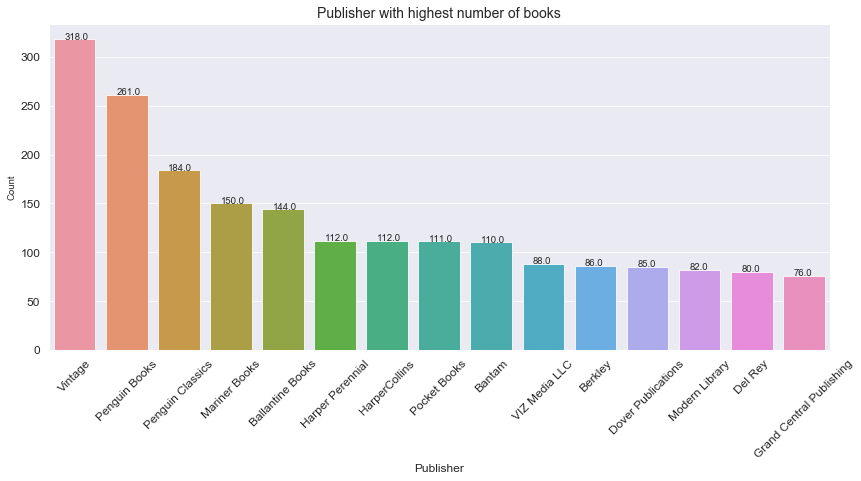

In [311]:
plt.figure(figsize = (14,6))
graph = sns.barplot(y = publisher, x = publisher.index)
plt.title('Publisher with highest number of books', fontsize = 14)
plt.xlabel('Publisher', fontsize = 12)
plt.ylabel('Count')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/4., height + 0.1, height)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

- Vintage Publisher has most number of books to its name over 300 books.

### Average Ratings of books

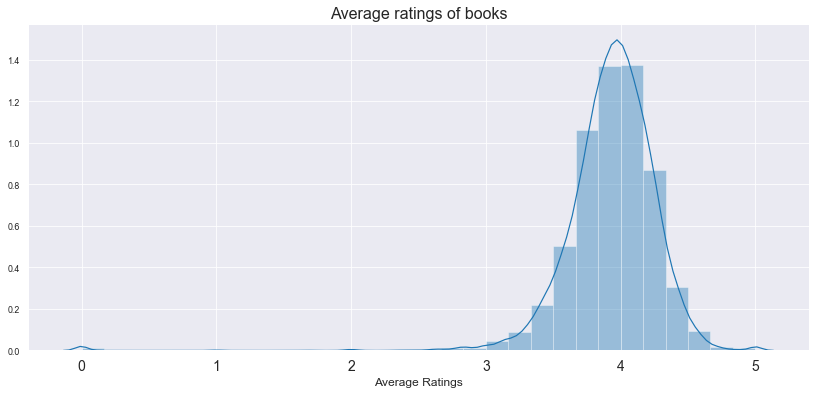

In [343]:
plt.figure(figsize = (14,6))
sns.distplot(df['average_rating'], bins = 30)
plt.title('Average ratings of books', fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel('Average Ratings', fontsize = 12)
plt.show()

- The ratings are given out of 5 stars.
- We can see that maximum number of books are rated between 3.5 and 4.5
- There are very few books which are rated 5 star and we can see that some books are rated 0 stars as well.

### What is the average number of pages in a book?

In [293]:
df.columns = df.columns.str.replace(' ', '')

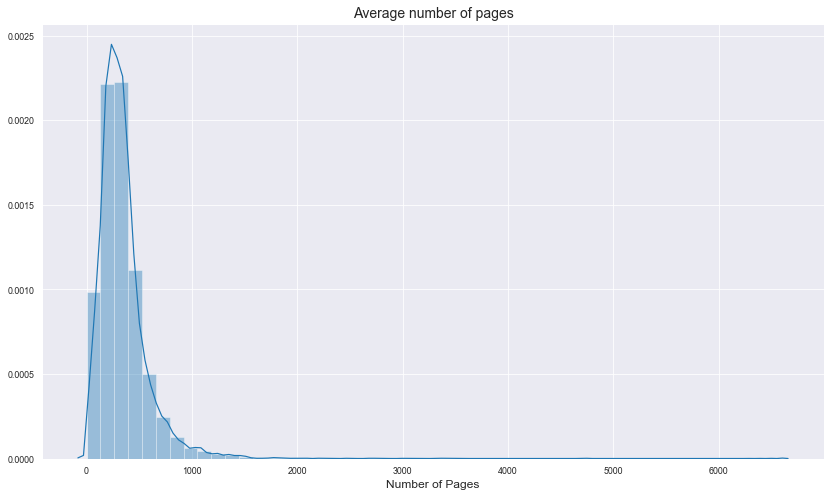

In [377]:
plt.figure(figsize = (14,8))
sns.distplot(df['num_pages'], bins = 50)
plt.title('Average number of pages', fontsize = 14)
plt.xlabel('Number of Pages', fontsize = 12)
plt.show()

- There are some books which contains more than 6000 pages.
- We can see that there are some amount books between 2000-6000 pages.
- We will look at the plot more closely between 0 to 2000 pages because there lies maximum books.

In [440]:
a = df.loc[(df.num_pages < 2000)]

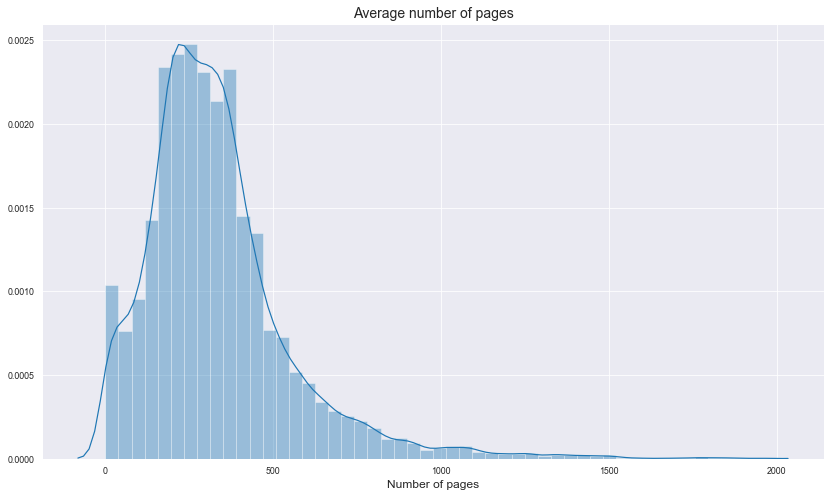

In [441]:
plt.figure(figsize = (14,8))
sns.distplot(a['num_pages'])
plt.title('Average number of pages', fontsize = 14)
plt.xlabel('Number of pages', fontsize = 12)
plt.show()

- From the plot, we can see that average number of pages in a book lies between the range of 250 and 400 pages.

### Checking relationship between Ratings and Review counts

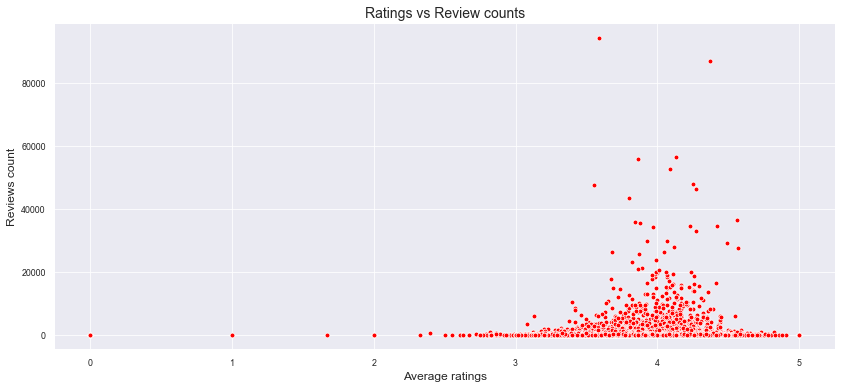

In [379]:
plt.figure(figsize=(14,6))
df.dropna(0, inplace=True)
sns.scatterplot(x = 'average_rating', y = 'text_reviews_count', data = df, color = 'red')
plt.title('Ratings vs Review counts', fontsize = 14)
plt.xlabel('Average ratings', fontsize = 12)
plt.ylabel('Reviews count', fontsize = 12)
plt.show()

- We can see that most of ratings lie between 3.5 and 4.5 stars. 
- We will plot the graph again with only 4000 reviews because density is more there.

In [438]:
a = df.loc[(df.text_reviews_count < 4000)]

<Figure size 1152x720 with 0 Axes>

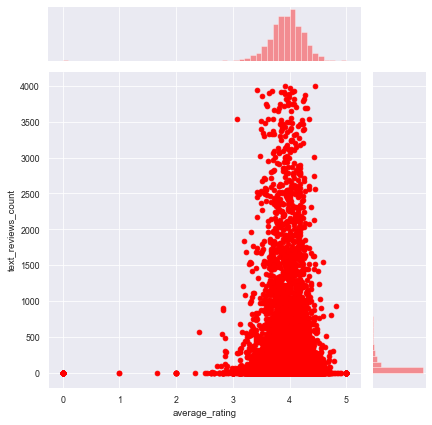

In [439]:
plt.figure(figsize=(16,10))
df.dropna(0, inplace=True)
sns.jointplot(x = 'average_rating', y='text_reviews_count', data = a, color = 'red')
plt.show()

- From the plot, we can see that ratings are more between 3.5 and 4.5.
- We can't much infer from the graph due to outliers.
- We can say that People rate the books more compared to reviewing books.

### Checking relationship between Ratings and Number of pages

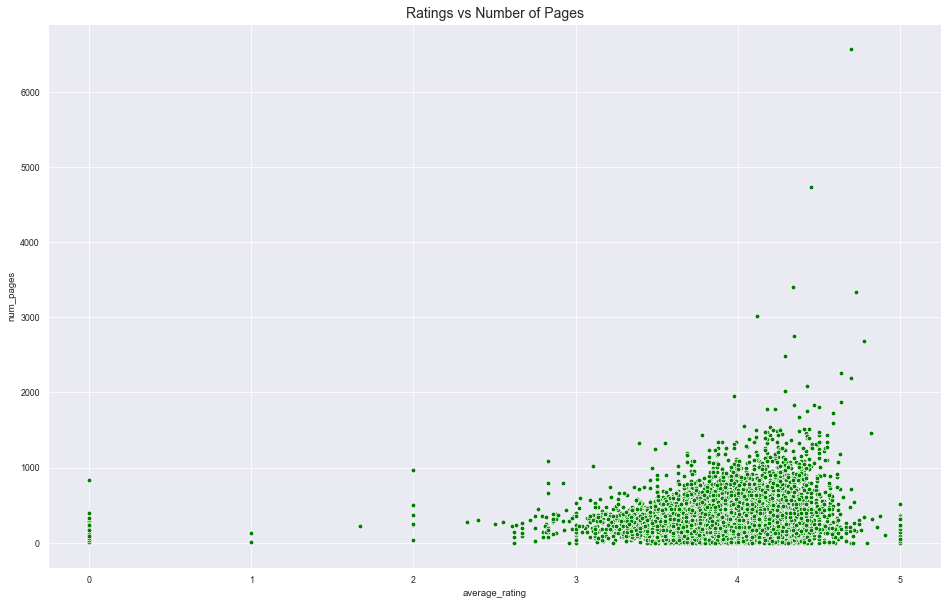

In [380]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'average_rating', y = 'num_pages', data = df, color = 'g')
plt.title('Ratings vs Number of Pages', fontsize = 14)
plt.show()

- We will look at the graph between the range of 0 to 10000 pages as the density is more there.

In [434]:
a = df.loc[(df.num_pages < 1000)]

<Figure size 1152x720 with 0 Axes>

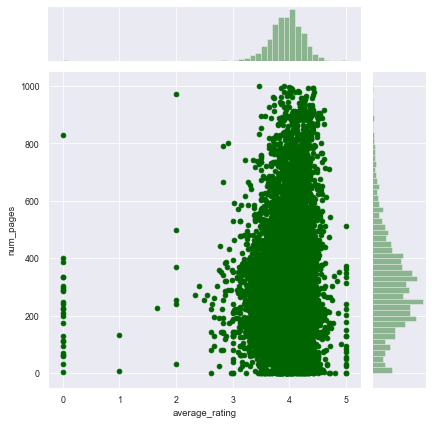

In [435]:
plt.figure(figsize=(16,10))
sns.jointplot(x = 'average_rating', y = 'num_pages', data = a, color = 'darkgreen')
plt.show()

- From the plot, we can see that the books containing pages between 200 to 400 are given the highest ratings.
- We can say that readers prefer books with moderate amount of pages.

### Authors with highest number of ratings

In [397]:
df.groupby('authors')['average_rating'].value_counts().sort_values(ascending = False).head(20)

authors                                 average_rating
Arthur Golden                           4.11              7
Toni Morrison                           3.93              6
Stephen King                            3.96              5
                                        4.02              5
Dan Brown                               3.84              5
Tite Kubo                               4.36              5
Gabriel García Márquez/Gregory Rabassa  4.07              5
Mark Haddon                             3.88              5
Lee Child/Dick Hill                     4.09              4
Orson Scott Card                        3.90              4
Lee Child/Dick Hill                     4.16              4
Rumiko Takahashi                        4.28              4
Debra Hess                              4.00              4
Herman Melville                         3.12              4
Francine Pascal                         3.97              4
Zadie Smith                             3.77 

*** The dataset is missing 'Genre' column, which would have been useful in finding top rated books based on genre. Because every person has their own favourite genre.***